In [ ]:
import pandas as pda
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reading dataset

In [ ]:
df = pda.read_csv('https://raw.githubusercontent.com/nayeem01/oxygen_level_prediction_sarima/master/data.csv')

In [ ]:
df.describe()

,temp,spcond (ms/cm),ph,Ox,do_persent,turbidity,chlorophyll,phycocyanin,sysbattery
count,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000,11858.000000
mean,20.941906,1.510206,7.860956,9.126104,102.881943,2.449129,2.076148,0.940625,12.253828
std,3.233775,0.558131,0.562303,1.510925,19.087482,3.549913,1.057412,0.673713,0.544124
min,13.420000,0.690000,6.820000,5.580000,58.430000,-1.630000,0.630000,0.140000,6.500000
25%,18.490000,0.990000,7.330000,8.170000,88.790000,1.840000,1.410000,0.470000,12.030000
50%,21.060000,1.590000,7.870000,9.250000,103.860000,2.220000,1.790000,0.850000,12.320000
75%,23.720000,2.000000,8.300000,10.100000,114.450000,2.740000,2.360000,1.190000,12.550000
max,28.830000,2.560000,9.390000,14.390000,174.310000,279.660000,14.670000,10.890000,13.560000


# Cheacking correlation is in -1 to 1

In [ ]:
df.corr()

,temp,spcond (ms/cm),ph,Ox,do_persent,turbidity,chlorophyll,phycocyanin,sysbattery
temp,1.000000,-0.309181,0.377783,0.121258,0.446837,-0.013292,-0.220220,0.180565,0.553171
spcond (ms/cm),-0.309181,1.000000,0.293552,0.313457,0.156739,0.021905,0.420438,0.107436,-0.065153
ph,0.377783,0.293552,1.000000,0.920925,0.955451,0.256044,0.403227,0.676690,0.350102
Ox,0.121258,0.313457,0.920925,1.000000,0.940846,0.289516,0.520148,0.668493,0.258131
do_persent,0.446837,0.156739,0.955451,0.940846,1.000000,0.266441,0.391506,0.669557,0.411199
turbidity,-0.013292,0.021905,0.256044,0.289516,0.266441,1.000000,0.047239,0.475749,0.042479
chlorophyll,-0.220220,0.420438,0.403227,0.520148,0.391506,0.047239,1.000000,0.222894,-0.223883
phycocyanin,0.180565,0.107436,0.676690,0.668493,0.669557,0.475749,0.222894,1.000000,0.173038
sysbattery,0.553171,-0.065153,0.350102,0.258131,0.411199,0.042479,-0.223883,0.173038,1.000000


# Ploting ph as x-axis and oxygen as y-axis

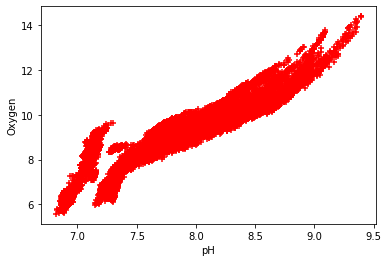

In [ ]:
%matplotlib inline
plt.xlabel('pH')
plt.ylabel('Oxygen')
plt.scatter(df.ph,df.Ox,color='red',marker='+')

# Data training 

In [ ]:
ph = df[['ph']]
ox = df[['Ox']]
from sklearn.model_selection import train_test_split
X = ph
y = ox
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
lm = LinearRegression()
lm.fit(ph,ox)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# testing our model

In [ ]:
lm.predict([[7.14]])

array([[7.3420602]])

# plotting pH value and predicted Oxygen value 
# shape is Y(dissolved_oxygen)= mx(ph)+c

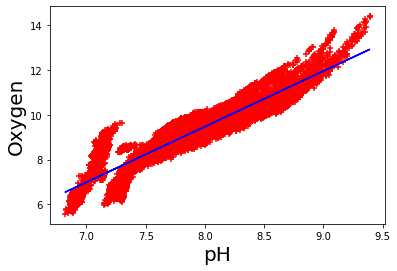

In [ ]:
%matplotlib inline
plt.xlabel('pH', fontsize=20)
plt.ylabel('Oxygen', fontsize=20)
plt.scatter(df.ph,df.Ox,color='red',marker='+')
plt.plot(df.ph,lm.predict(ph),color='blue')

# Reading input pH value from csv file

In [ ]:
test = pda.read_csv("/content/sample_data/test.csv")
test.head(5)

,ph
0,6.98
1,6.83
2,6.88
3,6.61


# Predicting output as Oxygen

In [ ]:
p = lm.predict(test)
p

array([[6.94613193],
       [6.57494917],
       [6.69867675],
       [6.03054779]])

# Calculating accuracy using R-squared statistic 

In [ ]:
accuracy = lm.score(X_test, y_test)
print (accuracy)
print(accuracy*100)

0.8430215710800057
84.30215710800057


#validation

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

In [ ]:
random_state = 1
param_range = np.logspace(-7,3,3)
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",param_range,cv=5)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

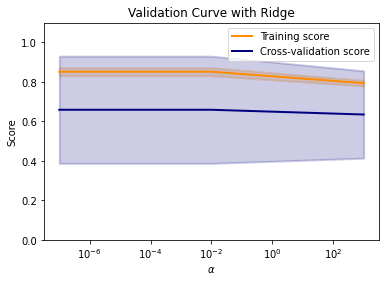

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
from google.colab import files
plt.title("Validation Curve with Ridge")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.2,color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
plt.savefig('plot3.jpg', dpi=300, bbox_inches='tight')
files.download('plot3.jpg')

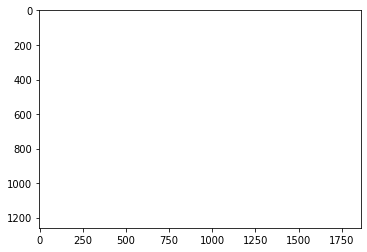

In [ ]:
# importing matplotlib modules
import matplotlib.image as mpimg
  
# Read Images
img = mpimg.imread('plot.png')
  
# Output Images
plt.imshow(img)